In [2]:
import numpy as np
from math import sin, pi, radians, factorial
import matplotlib.pyplot as plt
from pylab import *

In [3]:
def function1(x):
    return x ** 2 * sin(radians(x))


vfunc = np.vectorize(function1)

In [4]:
X = np.linspace(-1, 1, 5)
Y = vfunc(X)
print(X)
print(Y)

[-1.  -0.5  0.   0.5  1. ]
[-0.01745241 -0.00218163  0.          0.00218163  0.01745241]


In [5]:
def make_system(x, y, deg):
    A = np.zeros((deg, deg))
    B = np.zeros(deg)
    
    for i in range(deg):
        for j in range(deg):
            A[i][j] = sum(x ** (i + j))
            B[i] = sum(y * x ** i)
    return A, B

In [6]:
def approx(X, Y, deg):
    A, B = make_system(X, Y, deg + 1)
    return np.linalg.solve(A, B)[::-1]

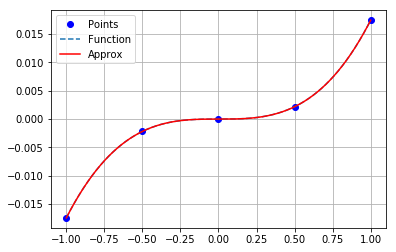

In [7]:
p = approx(X, Y, 3)  # вычисление коэффициентов многочлена
newx = np.linspace(-1, 1, 3000)
oldy = vfunc(newx)
yp = np.polyval(p, newx)  # вычисление значений многочлена
plt.plot(X, Y, 'bo', label='Points')
plt.plot(newx, oldy, '--', label='Function')
plt.plot(newx, yp, 'r', label='Approx')
plt.legend(loc="best")
plt.grid()
plt.show()

In [8]:
def leg_pol(x, n):
    # Recurent formulae
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return ((2 * (n - 1) + 1) * x * leg_pol(x, n - 1) - n * leg_pol(x, n - 2)) / n


vleg_pol = np.vectorize(leg_pol)

In [9]:
def make_system_leg(x, y, deg):
    A = np.zeros((deg, deg))
    B = np.zeros(deg)
    
    for i in range(deg):
        for j in range(deg):
            A[i][j] = sum(vleg_pol(x, i) * vleg_pol(x, j))
            B[i] = sum(y * vleg_pol(x, i))
    return A, B

In [10]:
def approx_leg(X, Y, deg):
    A, B = make_system_leg(X, Y, deg + 1)
    return np.linalg.solve(A, B)[::-1]

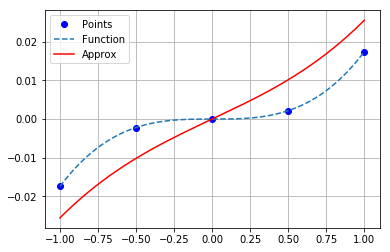

In [17]:
p = approx_leg(X, Y, 3)  # вычисление коэффициентов многочлена
newx = np.linspace(-1, 1, 3000)
oldy = vfunc(newx)
leg_vec = np.vectorize(leg_pol)
# yp = leg_pol(newx, 3) + leg_pol(newx, 2) + leg_pol(newx, 1) + newx
yp = np.polyval(p, newx)  # вычисление значений многочлена
plt.plot(X, Y, 'bo', label='Points')
plt.plot(newx, oldy, '--', label='Function')
plt.plot(newx, yp, 'r', label='Approx')
plt.legend(loc="best")
plt.grid()
plt.show()